**necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Load and inspect the dataset**

In [3]:
df = pd.read_csv("winequalityN.csv")
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nFirst 5 rows:")
display(df.head())

print("\nSummary statistics:")
display(df.describe())

Dataset Shape: (6497, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

First 5 rows:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Summary statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Check and Handle Missing Values**

In [7]:
print("\nMissing values by column:")
display(df.isnull().sum())

# Fill missing values with median (better than mean for potentially skewed distributions)
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column] = df[column].fillna(df[column].median())

# Verify missing values are handled
print("\nRemaining missing values:")
display(df.isnull().sum())



Missing values by column:


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


Remaining missing values:


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**(good/bad wine classification)**

In [9]:
df['quality_binary'] = (df['quality'] >= 6).astype(int)
print("\nBinary quality distribution:")
print(df['quality_binary'].value_counts())
print(f"Percentage of good wines (quality >= 6): {df['quality_binary'].mean()*100:.2f}%")

# Display quality distribution by wine type
print("\nQuality distribution by wine type:")
display(pd.crosstab(df['type'], df['quality']))


Binary quality distribution:
quality_binary
1    4113
0    2384
Name: count, dtype: int64
Percentage of good wines (quality >= 6): 63.31%

Quality distribution by wine type:


quality,3,4,5,6,7,8,9
type,,,,,,,
red,10,53,681,638,199,18,0
white,20,163,1457,2198,880,175,5


**Basic Visualizations**


*   Quality distribution
*   Quality distribution by wine type


*  Average features by quality
*   Wine type distribution





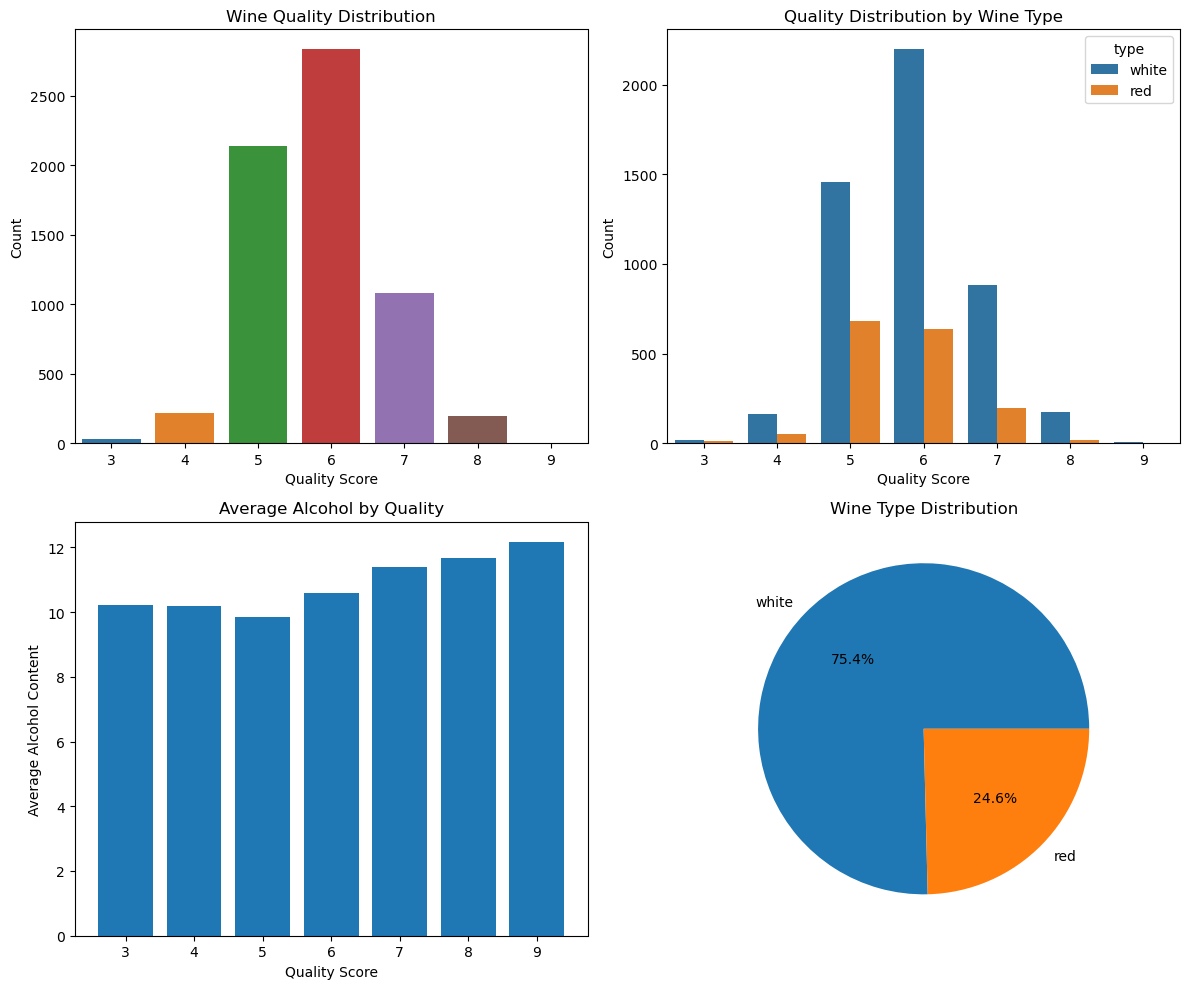

In [11]:
plt.figure(figsize=(12, 10))

# Plot 1: Quality distribution
plt.subplot(2, 2, 1)
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')

# Plot 2: Quality distribution by wine type
plt.subplot(2, 2, 2)
sns.countplot(x='quality', hue='type', data=df)
plt.title('Quality Distribution by Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Count')

# Plot 3: Average features by quality
plt.subplot(2, 2, 3)
avg_alcohol = df.groupby('quality')['alcohol'].mean()
plt.bar(avg_alcohol.index, avg_alcohol.values)
plt.title('Average Alcohol by Quality')
plt.xlabel('Quality Score')
plt.ylabel('Average Alcohol Content')

# Plot 4: Wine type distribution
plt.subplot(2, 2, 4)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Wine Type Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


**Feature Correlation Analysis**

Feature correlations with quality:


quality                 1.000000
quality_binary          0.814484
alcohol                 0.444319
citric acid             0.085704
free sulfur dioxide     0.055463
sulphates               0.038770
pH                      0.019350
residual sugar         -0.036941
total sulfur dioxide   -0.041385
fixed acidity          -0.076931
chlorides              -0.200742
volatile acidity       -0.265901
density                -0.305858
Name: quality, dtype: float64

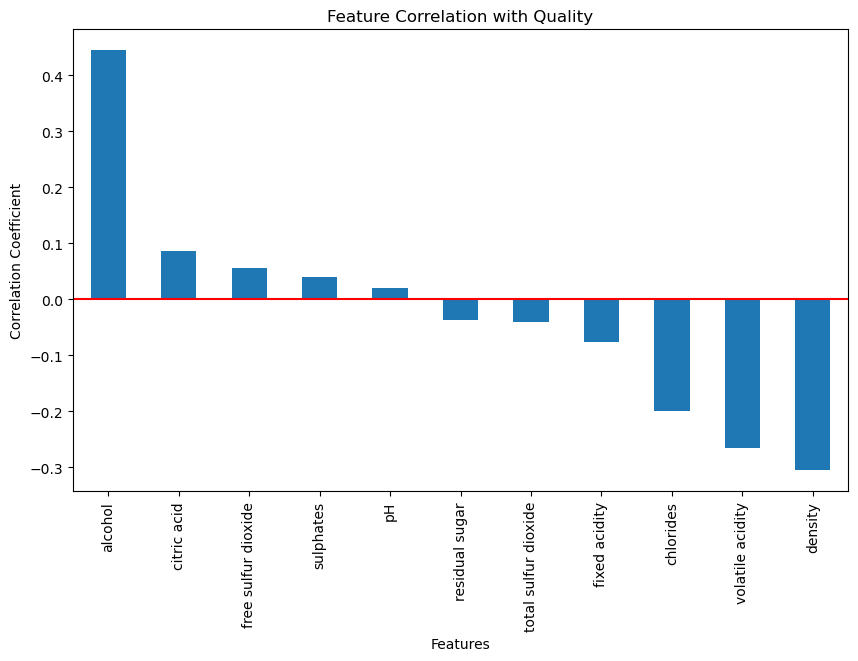

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['quality'].sort_values(ascending=False)

print("Feature correlations with quality:")
display(correlations)

# Visualize correlations with quality
plt.figure(figsize=(10, 6))
correlations.drop('quality').drop('quality_binary').plot(kind='bar')
plt.title('Feature Correlation with Quality')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

**Correlation Heatmap**

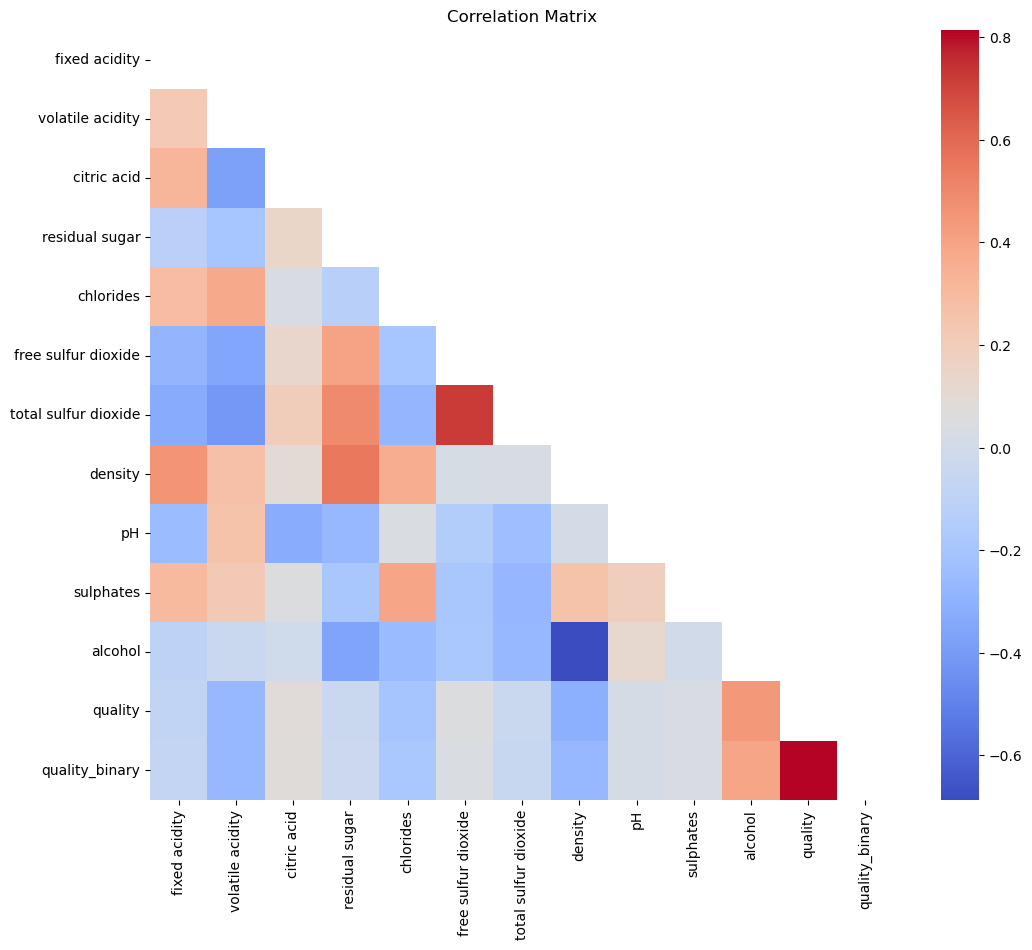

In [15]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

**Feature Distribution Analysis**

1.   Alcohol distribution by quality

2.   Density distribution by quality
3.   Volatile acidity by quality


4.   Chlorides by quality


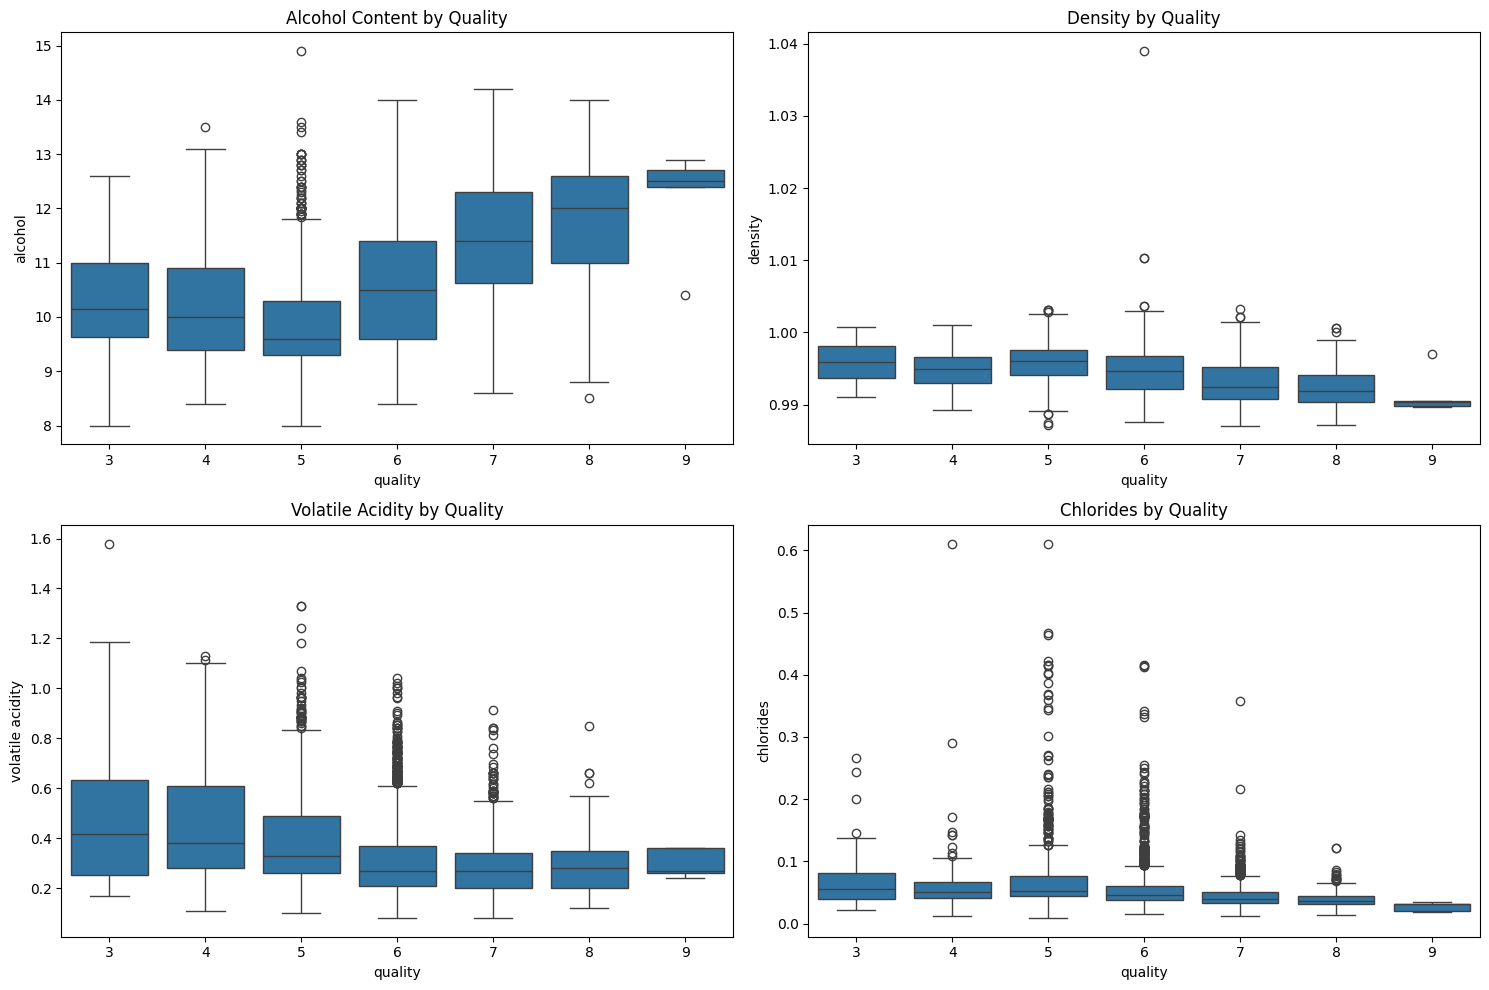

In [13]:
plt.figure(figsize=(15, 10))

# Feature 1: Alcohol distribution by quality
plt.subplot(2, 2, 1)
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content by Quality')

# Feature 2: Density distribution by quality
plt.subplot(2, 2, 2)
sns.boxplot(x='quality', y='density', data=df)
plt.title('Density by Quality')

# Feature 3: Volatile acidity by quality
plt.subplot(2, 2, 3)
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity by Quality')

# Feature 4: Chlorides by quality
plt.subplot(2, 2, 4)
sns.boxplot(x='quality', y='chlorides', data=df)
plt.title('Chlorides by Quality')

plt.tight_layout()
plt.show()


**Additional Insights by Wine Type**

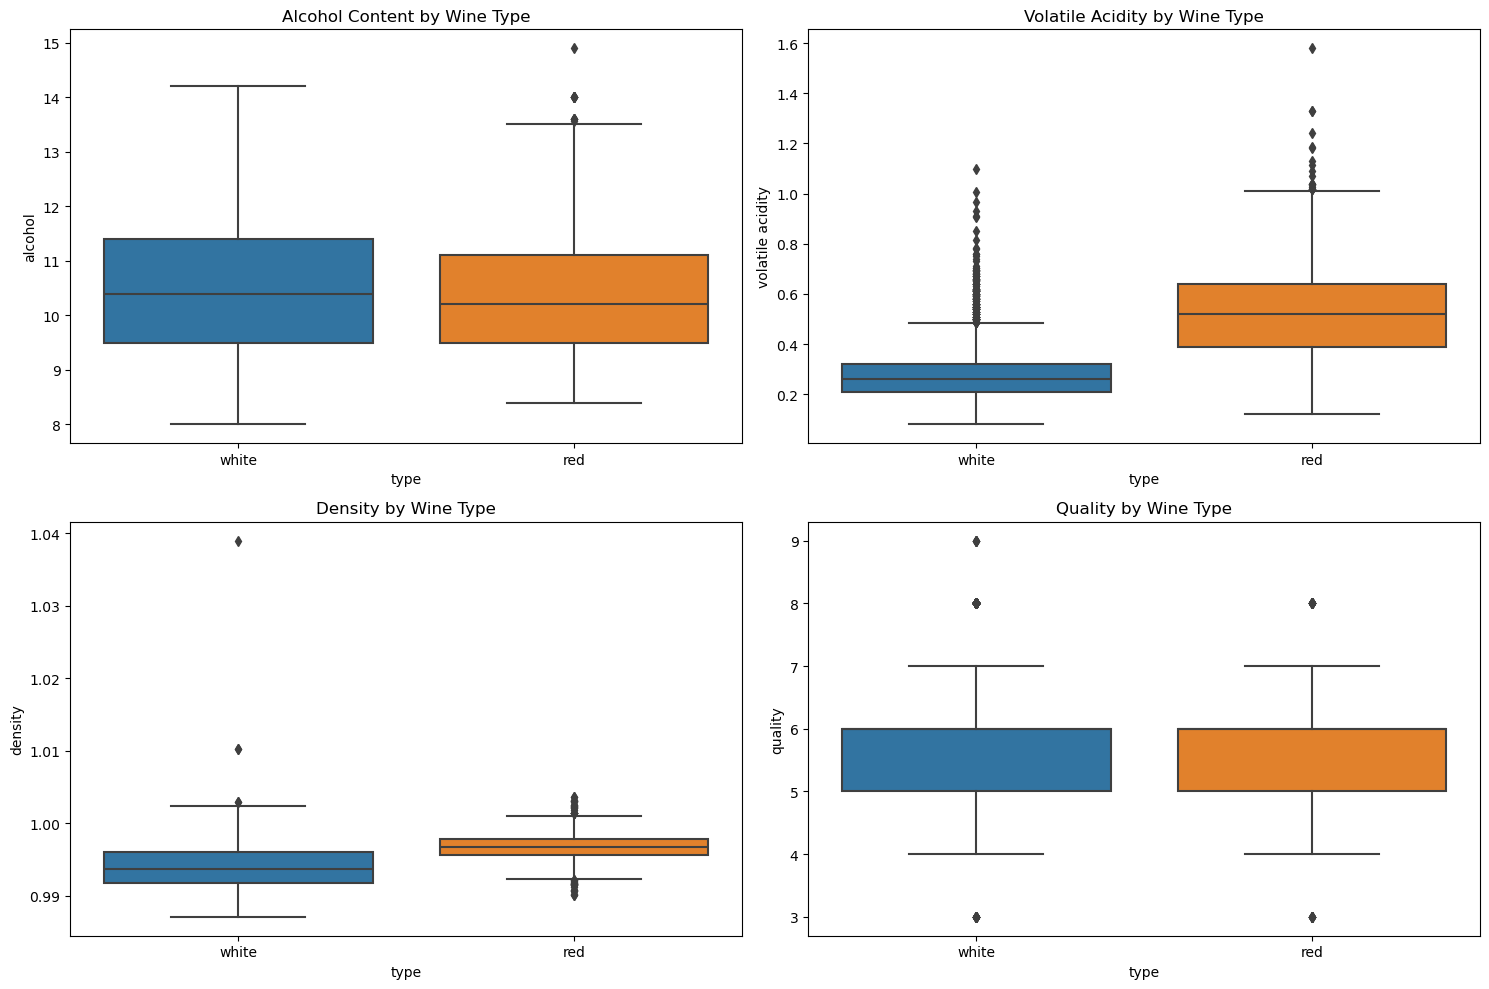

In [17]:
plt.figure(figsize=(15, 10))

# Plot 1: Alcohol content by type
plt.subplot(2, 2, 1)
sns.boxplot(x='type', y='alcohol', data=df)
plt.title('Alcohol Content by Wine Type')

# Plot 2: Acidity by type
plt.subplot(2, 2, 2)
sns.boxplot(x='type', y='volatile acidity', data=df)
plt.title('Volatile Acidity by Wine Type')

# Plot 3: Density by type
plt.subplot(2, 2, 3)
sns.boxplot(x='type', y='density', data=df)
plt.title('Density by Wine Type')

# Plot 4: Quality by type
plt.subplot(2, 2, 4)
sns.boxplot(x='type', y='quality', data=df)
plt.title('Quality by Wine Type')

plt.tight_layout()
plt.show()

**Key Feature Relationships**

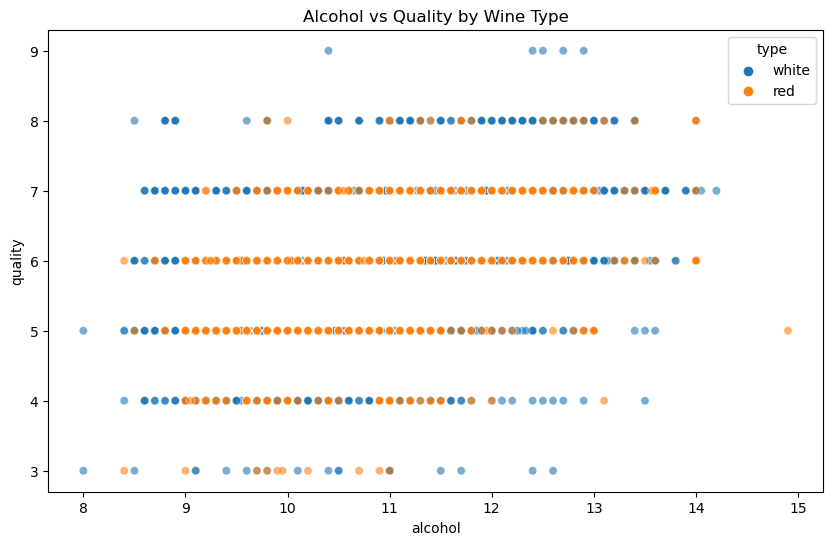

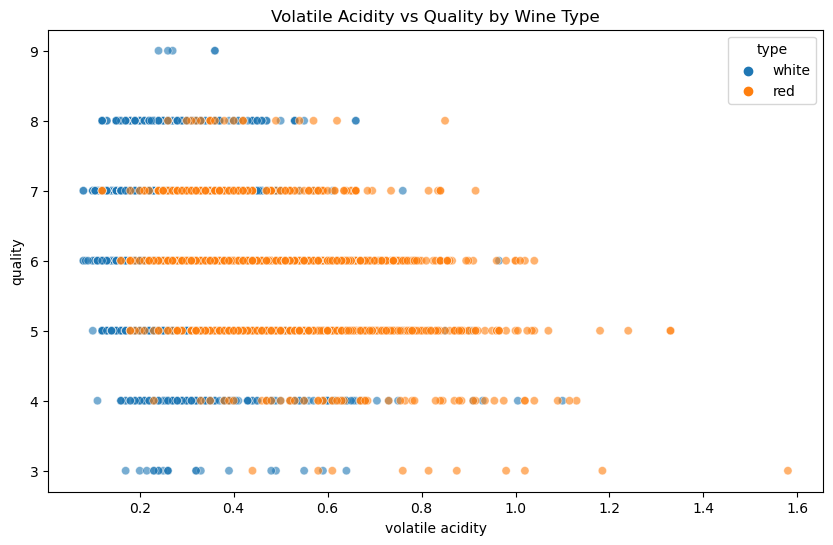

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', hue='type', data=df, alpha=0.6)
plt.title('Alcohol vs Quality by Wine Type')
plt.show()

# Scatter plot of volatile acidity vs quality with wine type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='quality', hue='type', data=df, alpha=0.6)
plt.title('Volatile Acidity vs Quality by Wine Type')
plt.show()


**Feature Engineering**

In [21]:
# Convert wine type to numeric
df['type_numeric'] = (df['type'] == 'white').astype(int)

# Create interaction terms for top features
df['alcohol_acidity'] = df['alcohol'] * df['volatile acidity']
df['alcohol_density'] = df['alcohol'] * df['density']

# Display the engineered features
print("Sample of engineered features:")
display(df[['type', 'type_numeric', 'alcohol', 'volatile acidity', 'alcohol_acidity', 'alcohol_density']].head())


Sample of engineered features:


,type,type_numeric,alcohol,volatile acidity,alcohol_acidity,alcohol_density
0,white,1,8.8,0.27,2.376,8.80880
1,white,1,9.5,0.30,2.850,9.44300
2,white,1,10.1,0.28,2.828,10.05051
3,white,1,9.9,0.23,2.277,9.85644
4,white,1,9.9,0.23,2.277,9.85644


**Prepare Data for Modeling**

In [23]:
selected_features = ['alcohol', 'density', 'volatile acidity', 'chlorides',
                     'type_numeric', 'alcohol_acidity', 'alcohol_density']

X = df[selected_features]
y = df['quality_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set shape: (5197, 7)
Testing set shape: (1300, 7)


**Random Forest Classifier**

In [25]:
print("\n--- Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)


--- Random Forest Classifier ---


RandomForestClassifier(max_depth=10, random_state=42)

**Cross-validation**

In [27]:
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Cross-validation accuracy: 0.7820 ± 0.0088


**Evaluate on test set**

In [29]:
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Test accuracy: {rf_accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Test accuracy: 0.7785

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       477
           1       0.79      0.89      0.84       823

    accuracy                           0.78      1300
   macro avg       0.77      0.74      0.75      1300
weighted avg       0.78      0.78      0.77      1300



**Random Forest Confusion Matrix and Feature Importance**

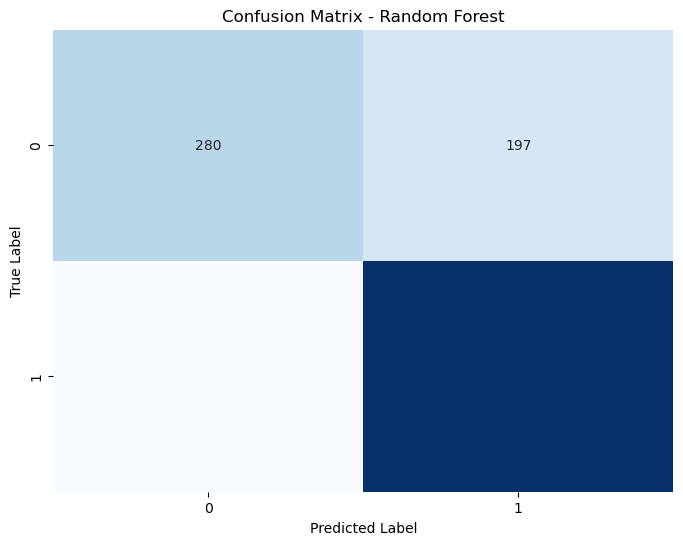

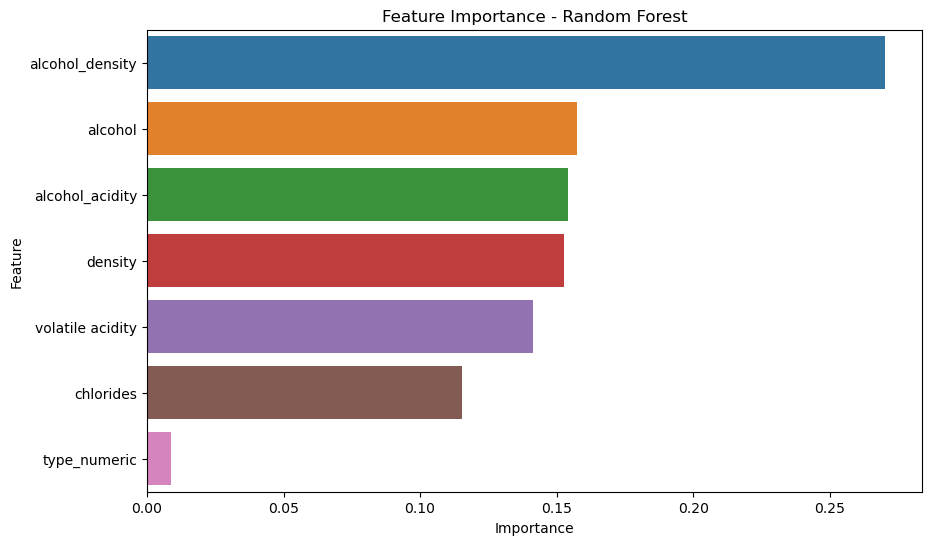

In [31]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.show()

**Gradient Boosting Classifier**

In [33]:
print("\n--- Gradient Boosting Classifier ---")
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {gb_cv_scores.mean():.4f} ± {gb_cv_scores.std():.4f}")

# Evaluate on test set
y_pred_gb = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Test accuracy: {gb_accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


--- Gradient Boosting Classifier ---
Cross-validation accuracy: 0.7720 ± 0.0057
Test accuracy: 0.7731

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       477
           1       0.78      0.88      0.83       823

    accuracy                           0.77      1300
   macro avg       0.76      0.73      0.74      1300
weighted avg       0.77      0.77      0.77      1300



**Gradient Boosting Confusion Matrix and Feature Importance**

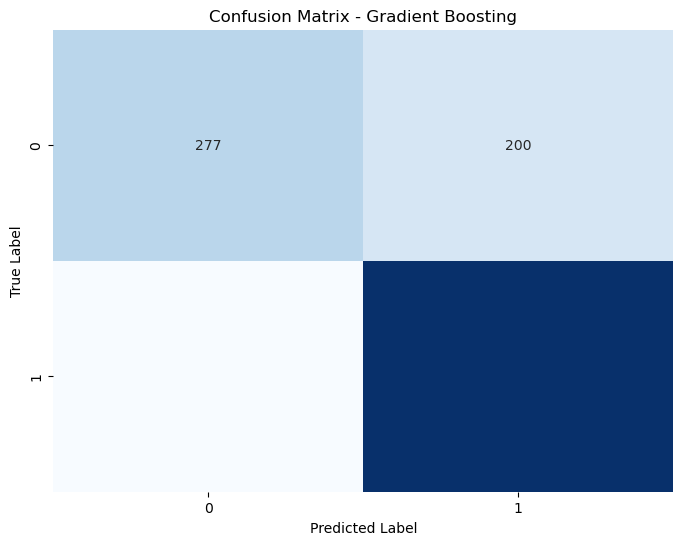

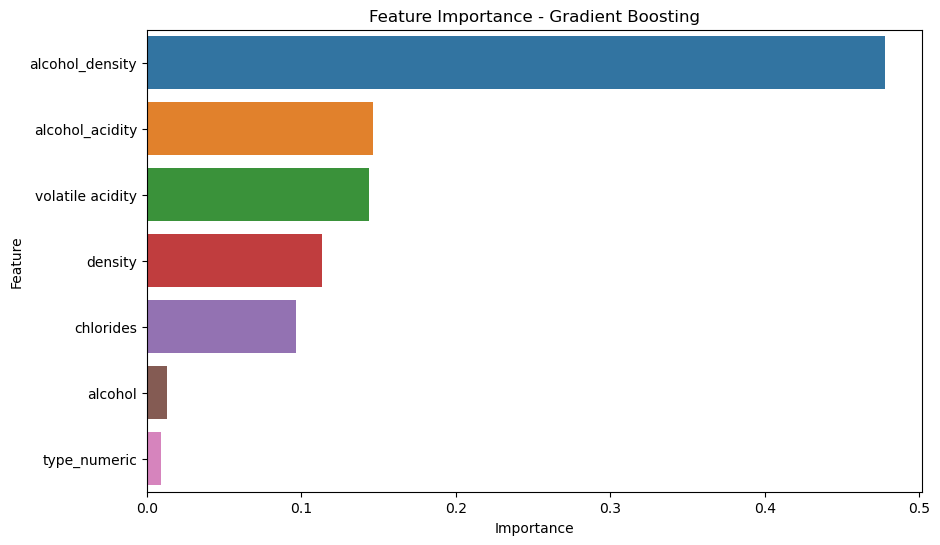

In [37]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
feature_importance_gb = pd.DataFrame({
    'Feature': selected_features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_gb)
plt.title('Feature Importance - Gradient Boosting')
plt.show()




**Model Comparison**


--- Model Comparison ---


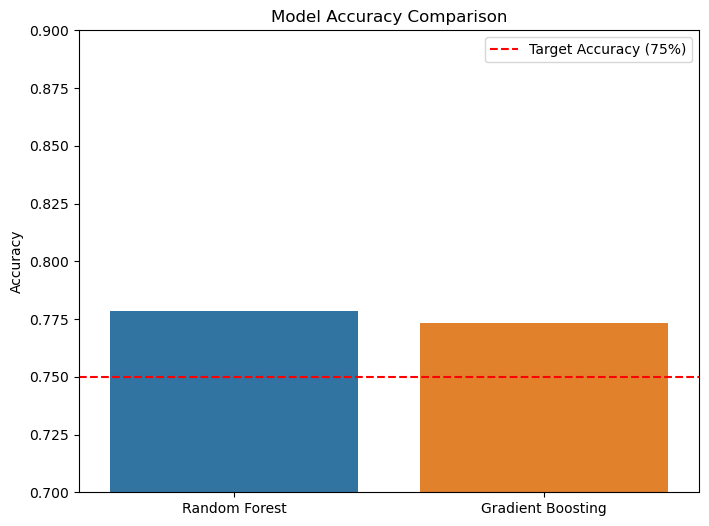

In [39]:
print("\n--- Model Comparison ---")
models = ['Random Forest', 'Gradient Boosting']
accuracies = [rf_accuracy, gb_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0.7, 0.9)  # Set y-axis to focus on relevant range
plt.axhline(y=0.75, color='r', linestyle='--', label='Target Accuracy (75%)')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Save the best model**

In [41]:
import joblib
if rf_accuracy > gb_accuracy:
    joblib.dump(rf_model, 'wine_quality_model.pkl')
    print("Random Forest model saved as 'wine_quality_model.pkl'")
else:
    joblib.dump(gb_model, 'wine_quality_model.pkl')
    print("Gradient Boosting model saved as 'wine_quality_model.pkl'")

Random Forest model saved as 'wine_quality_model.pkl'


**Bonus - Multi-class Classification**

In [43]:
print("\n--- Bonus: Multi-class Classification ---")
X_multi = df[selected_features]
y_multi = df['quality']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

X_train_multi_scaled = scaler.fit_transform(X_train_multi)
X_test_multi_scaled = scaler.transform(X_test_multi)

rf_multi = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_multi.fit(X_train_multi_scaled, y_train_multi)

y_pred_multi = rf_multi.predict(X_test_multi_scaled)
multi_accuracy = accuracy_score(y_test_multi, y_pred_multi)
print(f"Multi-class accuracy: {multi_accuracy:.4f}")

# Evaluate how close we are to the true quality scores
mae = np.mean(np.abs(y_test_multi - y_pred_multi))
print(f"Mean Absolute Error: {mae:.4f}")


--- Bonus: Multi-class Classification ---
Multi-class accuracy: 0.6023
Mean Absolute Error: 0.4362


**Visualize Multi-class Results**

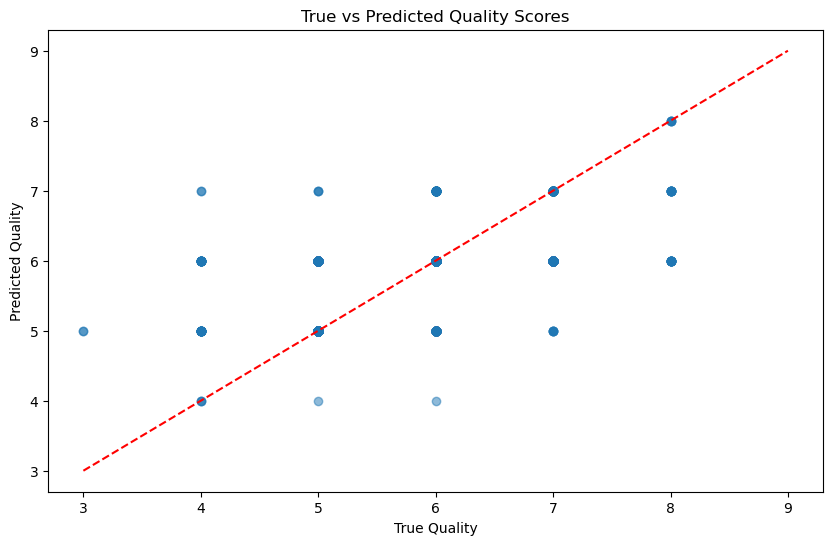

In [45]:
# Visualize true vs predicted quality scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.5)
plt.plot([3, 9], [3, 9], 'r--')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted Quality Scores')
plt.show()


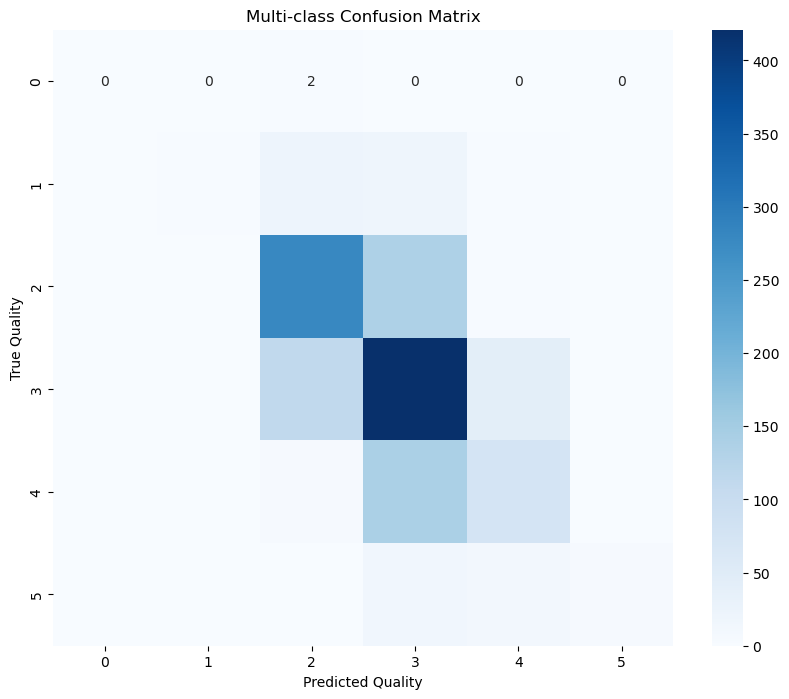

In [47]:
# Confusion matrix for multi-class
plt.figure(figsize=(10, 8))
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
sns.heatmap(cm_multi, annot=True, fmt="d", cmap="Blues")
plt.title('Multi-class Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

**Summary and Conclusion**

### Key Features:
1. Alcohol content
2. Density
3. Volatile acidity
4. Interaction between alcohol and acidity

### Takeaways:
- The binary classification task exceeds the 75% accuracy target
- Wine type has significant influence on chemical properties
- Higher alcohol content generally indicates higher quality
- Models can successfully distinguish between good and bad wines

**Hyperparameter Tuning**

In [49]:
# Define parameter grid for Random Forest
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_rf.best_score_))

# Test the tuned model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print("Tuned Random Forest Test Accuracy: {:.4f}".format(best_rf_accuracy))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.7985
Tuned Random Forest Test Accuracy: 0.8031
